<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Projects/Food_Recognition_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Recognition / Segmentation 

Link for the competition : https://www.aicrowd.com/challenges/food-recognition-challenge

So this is an dataset from AICrowd’s closed competition, since I have worked with a lot of Image Classification problem now I think it’s time for me to tackle a different problem other than segmentation. 

**So the two main challenge is I am going to use TensorFlow to build this project and deploy once it’s done.** 

I am planning to spend 1-2 hours everyday on this and no worries even if it takes a month to finish. Can’t wait to learn what’s in this and this could be one of my biggest milestone project if I get this done. 

In [27]:
!nvidia-smi

Tue Jun  8 14:15:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [29]:
# Importing my drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Getting our paths (train and validation)
train_gz = 'drive/MyDrive/data/train-v0.4.tar.gz'
#val_gz = 'drive/MyDrive/data/val-v0.4.tar.gz' can't open this file 

# And thank goodness the val images and annot is in the train_gz file itself.

In [31]:
# Extracting all the files inside our tar file 
import tarfile 
file = tarfile.open(train_gz)
file.extractall('fine_data/')

In [32]:
# Getting the paths of image and the annotations seperate 

train_images = 'fine_data/train/images'
train_annot = 'fine_data/train/annotations.json'
val_images = 'fine_data/val/images'
val_annot = 'fine_data/val/annotations.json'

## Become one with the image data 

In [33]:
# How many images are there in our train and val folder? 
import os
num_train_imgs = len(os.listdir(train_images))
num_val_imgs = len(os.listdir(val_images))

print(f'Number of images in the training folder: {num_train_imgs}')
print(f'Number of images in the validation folder: {num_val_imgs}')

Number of images in the training folder: 24119
Number of images in the validation folder: 1269


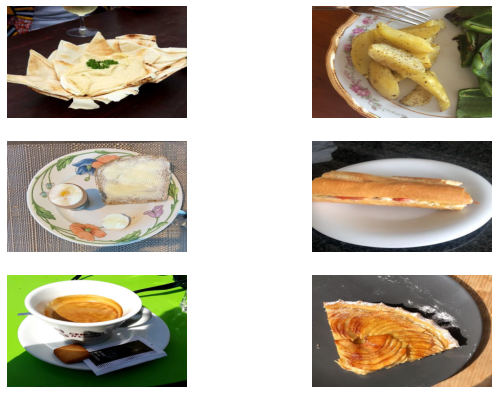

In [34]:
# Creating a function that will help us to visualize random images from train / validation set
import random
from PIL import Image

def plot_random_images(columns , rows , img_width , img_height , folder):
  fig = plt.figure(figsize = (10 , 7))
  for i in range(1 , columns*rows + 1):
    img_file = random.choice(os.listdir(folder))
    img = Image.open(folder + '/' + img_file)
    img = img.resize((img_width , img_height) , Image.ANTIALIAS)
    fig.add_subplot(rows , columns , i)
    plt.axis('off')
    plt.imshow(img)
  plt.show()

# Using the function
plot_random_images(2 , 3 , img_width= 400, img_height= 250 , 
                   folder = train_images)

### Things to do: 
- [x] Download the data from AICrowd database 
- [x] Write a script to untar the data because it’s in the tar.gz format. I did tried using `tf.keras.utils.get_files`  but the problem is I can’t find the root path.  
- [x] Visualise and become one with the image data 
- [ ] Dig deep into the annotation file and see what’s in there.
- [ ] Find a way to annotate the image 
- [ ] Plot random images with annotations 

Will continue tomorrow! 




Alright we have visualized our data, now it's time to unravel the annotations file and see if we can mask it on our image and visualize it. 

In [35]:
# Importing the needed library 
import json 

# Opening the json file 
train_file = open(train_annot)

# Returning a JSON object as a dictionary 
annot_train = json.load(train_file)


In [36]:
annot_train.keys()

dict_keys(['categories', 'info', 'images', 'annotations'])

In [37]:
for annot in annot_train:
  print(annot)

categories
info
images
annotations


In [38]:
for i in annot_train['annotations'][:1]:
  print(i)

{'id': 102434, 'image_id': 65537, 'category_id': 2578, 'segmentation': [[235.99999999999997, 372.5, 169.0, 372.5, 163.0, 370.5, 155.5, 360.0, 140.5, 295.0, 127.49999999999999, 172.0, 128.5, 110.0, 134.5, 97.0, 141.0, 92.5, 173.0, 86.5, 240.00000000000003, 83.5, 266.0, 86.5, 284.0, 92.5, 290.5, 99.0, 297.5, 138.0, 297.5, 232.0, 284.5, 341.0, 277.5, 363.0, 273.0, 368.5, 264.0, 371.5]], 'area': 44320.0, 'bbox': [86.5, 127.49999999999999, 286.0, 170.0], 'iscrowd': 0}


In [45]:
# Using pandas to read the json file 

with open(train_annot) as json_data:
  data = json.load(json_data)

# Putting them into a dataframe 
pd.DataFrame.from_dict(data , orient='columns')

ValueError: ignored